Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libzbar0 is already the newest version (0.23.92-4build2).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.

   QR Code Project
   By Rabiha & Ayesha
1. Generate QR Code
2. Scan QR from Images
3. Exit
Enter choice (1-3): 1
Enter text/link for QR: This is Our Project


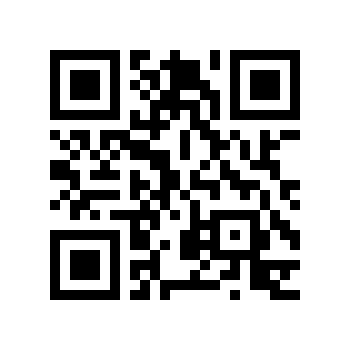

✅ QR Generated: generated_qr.png
✅ QR Verified Successfully!

   QR Code Project
   By Rabiha & Ayesha
1. Generate QR Code
2. Scan QR from Images
3. Exit
Enter choice (1-3): 2

📂 Available Image Files:
1. number.png
2. Blurred QR code on white background.png
3. event.png
4. generated_qr.png
5. ChatGPT Image Jan 31, 2026, 02_14_36 PM.png
6. combined_qr_codes (1).png
7. email.png

Enter file numbers (comma separated): 1,2


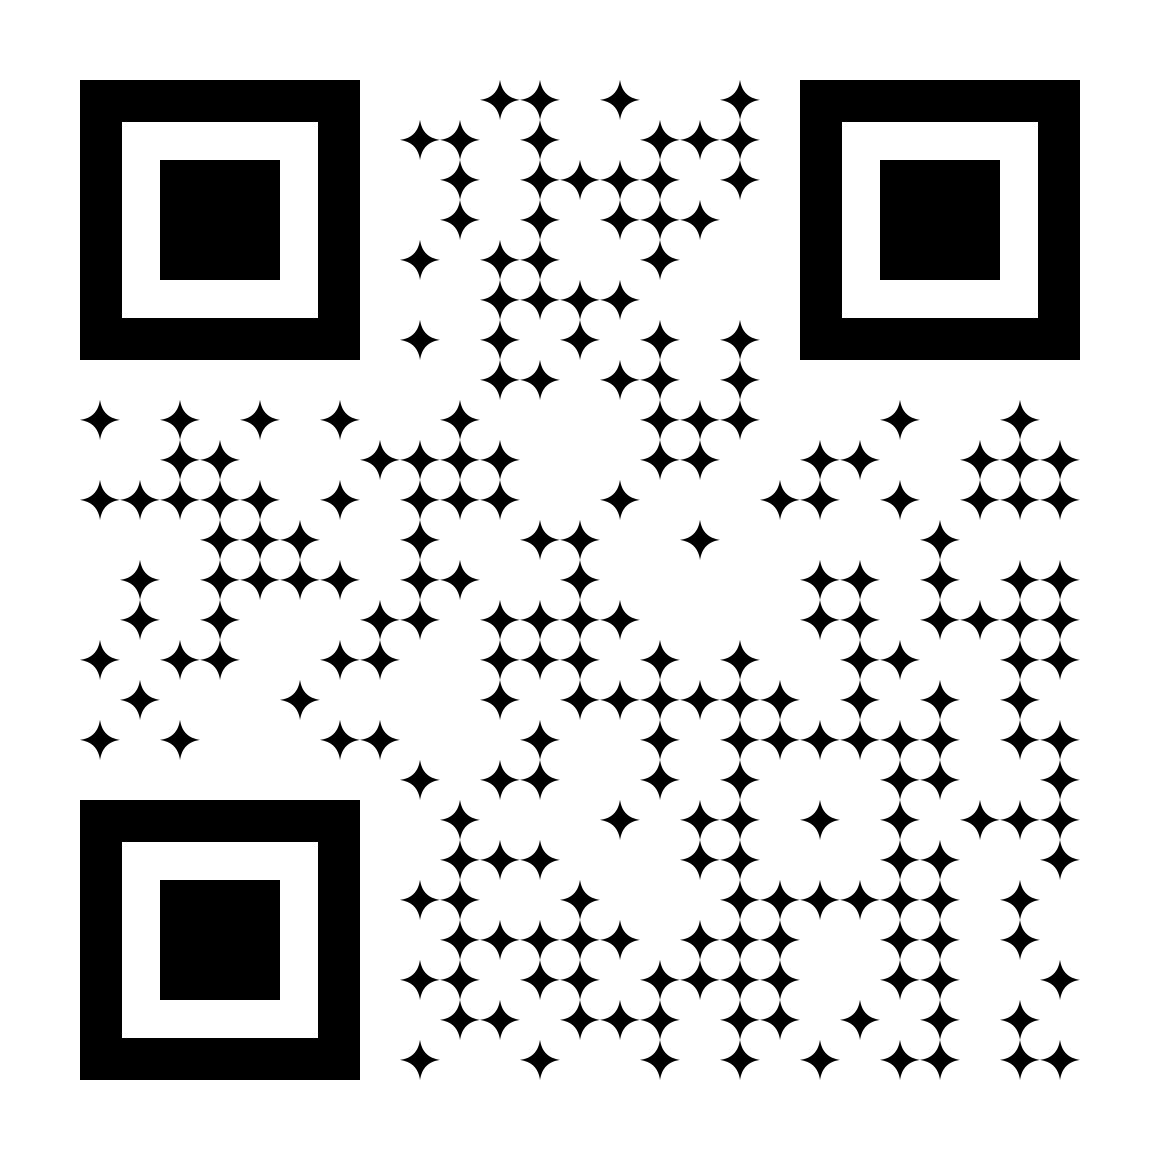

✅ Image is Clear!

📄 Scanned Data:
tel:03014580641
Enter choice (1-3): 3


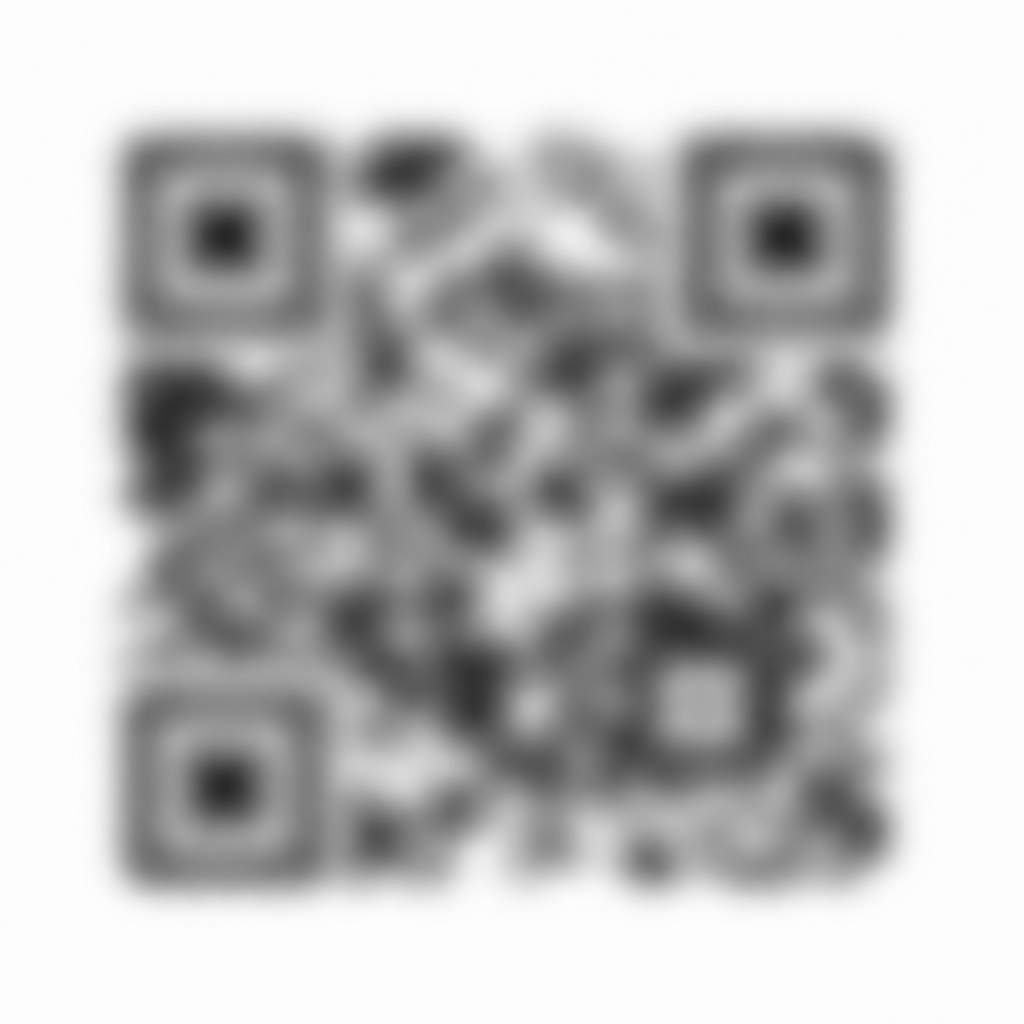

⚠️ Image is Blurry!
❌ No QR Code Found!

   QR Code Project
   By Rabiha & Ayesha
1. Generate QR Code
2. Scan QR from Images
3. Exit
👋 Goodbye!


In [4]:
# ===============================
# QR Code Scanner , Verify & Generator
# By Rabiha & Ayesha
# ===============================
!apt-get install -y libzbar0
!pip install qrcode[pil] pyzbar opencv-python pillow


import cv2
import qrcode
from pyzbar import pyzbar
from PIL import Image
import os
from IPython.display import display


# ========== Blur Check ==========
def check_blur(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()

    if laplacian_var < 100:
        return True   # Blurry
    else:
        return False  # Clear


# ========== Generate QR with Verification ==========
def generate_qr():

    text = input("Enter text/link for QR: ").strip()

    if not text:
        print("❌ Empty input not allowed!")
        return

    # Create QR
    qr = qrcode.QRCode(
        version=1,
        box_size=10,
        border=5
    )

    qr.add_data(text)
    qr.make(fit=True)

    img = qr.make_image(fill_color="black", back_color="white")

    # Show QR
    display(img)

    filename = "generated_qr.png"
    img.save(filename)

    print("✅ QR Generated:", filename)


    # ---------- Verify QR ----------
    qr_image = cv2.imread(filename)

    decoded = pyzbar.decode(qr_image)

    if decoded:
        scanned_text = decoded[0].data.decode("utf-8")

        if scanned_text == text:
            print("✅ QR Verified Successfully!")
        else:
            print("⚠️ QR Data Mismatch!")

    else:
        print("⚠️ QR Verification Failed!")



# ========== Scan Images ==========
def scan_images():

    print("\n📂 Available Image Files:")

    files = [
        f for f in os.listdir()
        if f.lower().endswith((".png", ".jpg", ".jpeg"))
    ]

    if not files:
        print("❌ No image files found!")
        return


    for i, file in enumerate(files, 1):
        print(f"{i}. {file}")


    choices = input("\nEnter file numbers (comma separated): ")


    try:
        choices = [int(x.strip()) - 1 for x in choices.split(",")]
    except:
        print("❌ Invalid Input!")
        return


    for c in choices:

        if c < 0 or c >= len(files):
            print("❌ Invalid Choice!")
            continue


        filename = files[c]

        img = cv2.imread(filename)

        if img is None:
            print("❌ Cannot read:", filename)
            continue


        # Show Image
        display(Image.open(filename))


        # Blur Check
        if check_blur(img):
            print("⚠️ Image is Blurry!")
        else:
            print("✅ Image is Clear!")


        # QR Decode
        decoded_objects = pyzbar.decode(img)


        if not decoded_objects:
            print("❌ No QR Code Found!")
            continue


        for obj in decoded_objects:

            data = obj.data.decode("utf-8")

            print("\n📄 Scanned Data:")
            print(data)



# ========== Main Menu ==========
def main():

    while True:

        print("\n==============================")
        print("   QR Code Project")
        print("   By Rabiha & Ayesha")
        print("==============================")
        print("1. Generate QR Code")
        print("2. Scan QR from Images")
        print("3. Exit")
        print("==============================")

        choice = input("Enter choice (1-3): ")


        if choice == "1":
            generate_qr()

        elif choice == "2":
            scan_images()

        elif choice == "3":
            print("👋 Goodbye!")
            break

        else:
            print("❌ Invalid Choice!")



# ========== Run Program ==========
main()
